# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
# import warnings 
# warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [43]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [44]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Missing Value**

In [45]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429     int64
ID                                   0    0.000000     int64
Z_CostContact                        0    0.000000     int64
Complain                             0    0.000000    object
AcceptedCmp2                         0    0.000000    object
AcceptedCmp1                         0    0.000000   float64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp4                         0    0.000000     int64
AcceptedCmp3                         0    0.000000    object
NumWebVisitsMonth                    0    0.000000     int64
NumStorePurchases                    0    0.000000     int64
NumCatalogPurchases                  0    0.000000     int64
NumWebPurchases                      0    0.000000     int64
NumDealsPurchases                    0    0.000000     int64
Z_Revenue                            0    0.000000     in

### **Drop**

In [46]:
# print("Jumlah rows sebelum drop missing values =", df.shape[0])
# df = df.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values =", df.shape[0])
# df.isna().sum()

### **Imputation**

Imputation (Median), karena Highly Positively Skewed

In [47]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Imputation using `fillna`

In [48]:
# df['Income'].fillna(df['Income'].median(), inplace=True)
# df.isna().sum()

Imputation using `SimpleImputer`

In [49]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# df["Income"] = imputer.fit_transform(df[["Income"]])
# df["Income"].isna().sum()

In [50]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

#### **Transform Temp**

Transform beberapa kolom object/string, karena penggunaan multivariate approch memerlukan semua kolom numeric

In [51]:
df_ma = df.copy()

**Label Encoding**

1. Menggunakan `LabelEncoder`

In [52]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df_ma['Education'])
# df_ma['Education'] = le.transform(df_ma['Education'])
# print(le.classes_)

2. Menggunakan Metode `Mapping`

In [53]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}

df_ma['Education'] = df_ma['Education'].map(map_edu)
df_ma['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

**One Hot Encoding**

1. Menggunakan `get_dummies`

In [54]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df_ma["Marital_Status"])
# df_ma.drop("Marital_Status", axis=1, inplace=True)
# df_ma = df_ma.join(ohe)

# # cara 2 : Auto drop Column
# # df_ma = pd.get_dummies(data=df_ma, columns=["Marital_Status"])

# df_ma.head()

2. Menggunakan `OneHotEncoder`

In [55]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df_ma[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
df_ma.drop("Marital_Status", axis=1, inplace=True)

print(oh.categories_[0])
df_ma = pd.concat([df_ma, df_ohe], axis=1)
df_ma.head()

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,1,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,1,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,1,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,1,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Drop Date Columns**

In [56]:
df_ma = df_ma.drop("Dt_Customer", axis=1)

**Two main methods we use here to impute missing values**

- KNN or K-Nearest Neighbor
- MICE or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

*To install fancyimpute*

`pip install fancyimpute`

#### **Imputation using `KNNImputer`**

In [57]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [58]:
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [59]:
# from fancyimpute import KNN

# knn_imputer = KNN()
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [60]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

In [61]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [62]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [63]:
# from fancyimpute import IterativeImputer
# mice_imputer = IterativeImputer()
# # filling the missing value with mice imputer
# df_imputed = pd.DataFrame(
#     mice_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [64]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [65]:
print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [66]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df_ma,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["Income"] = df_imputed["Income"].copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [67]:
print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

Jumlah missing values Income setelah Imputation = 0


### **Kesimpulan**

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data, yang berarti tergolong jauh di bawah batas aman penghapusan data (10%). Sehingga keputusan yang kami lakukan terhadap missing value tersebut, yaitu dengan menghapus keseluruhan baris pada kolom Income yang memiliki nilai null (kosong)  

## **📌 Handling Duplicated Data**

In [68]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [69]:
df.duplicated().sum()

0

In [70]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


### **Kesimpulan**
Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data

## **📌 Handling Invalid Values**

In [71]:
#cek unique value
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

**Melakukan konversi data `Date`**

In [72]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

**Melakukan penyederhanaan `Marital_Status`**

- Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
- Mengganti kategori 'Alone' menjadi 'Single'
- Mengganti kategori 'Together' menjadi 'Married'

In [73]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [74]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow', 'Others'], dtype=object)

**Melakukan penyederhanaan `Education_Simple`**

Untuk kategori '2n Cycle' dan 'Master' juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori "2n Cycle" akan dihapus dan digantikan dengan kategori "Master".

In [75]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [76]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Handling Outliers**

In [77]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Year_Birth,True,1932.0,2004.0,3,2237
1,Income,True,-14290.5,118153.5,8,2232
2,Kidhome,False,-1.5,2.5,0,2240
3,Teenhome,False,-1.5,2.5,0,2240
4,Recency,False,-51.0,149.0,0,2240
5,MntWines,True,-697.0,1225.0,35,2205
6,MntFruits,True,-47.0,81.0,227,2013
7,MntMeatProducts,True,-308.0,556.0,175,2065
8,MntFishProducts,True,-67.5,120.5,223,2017
9,MntSweetProducts,True,-47.0,81.0,248,1992


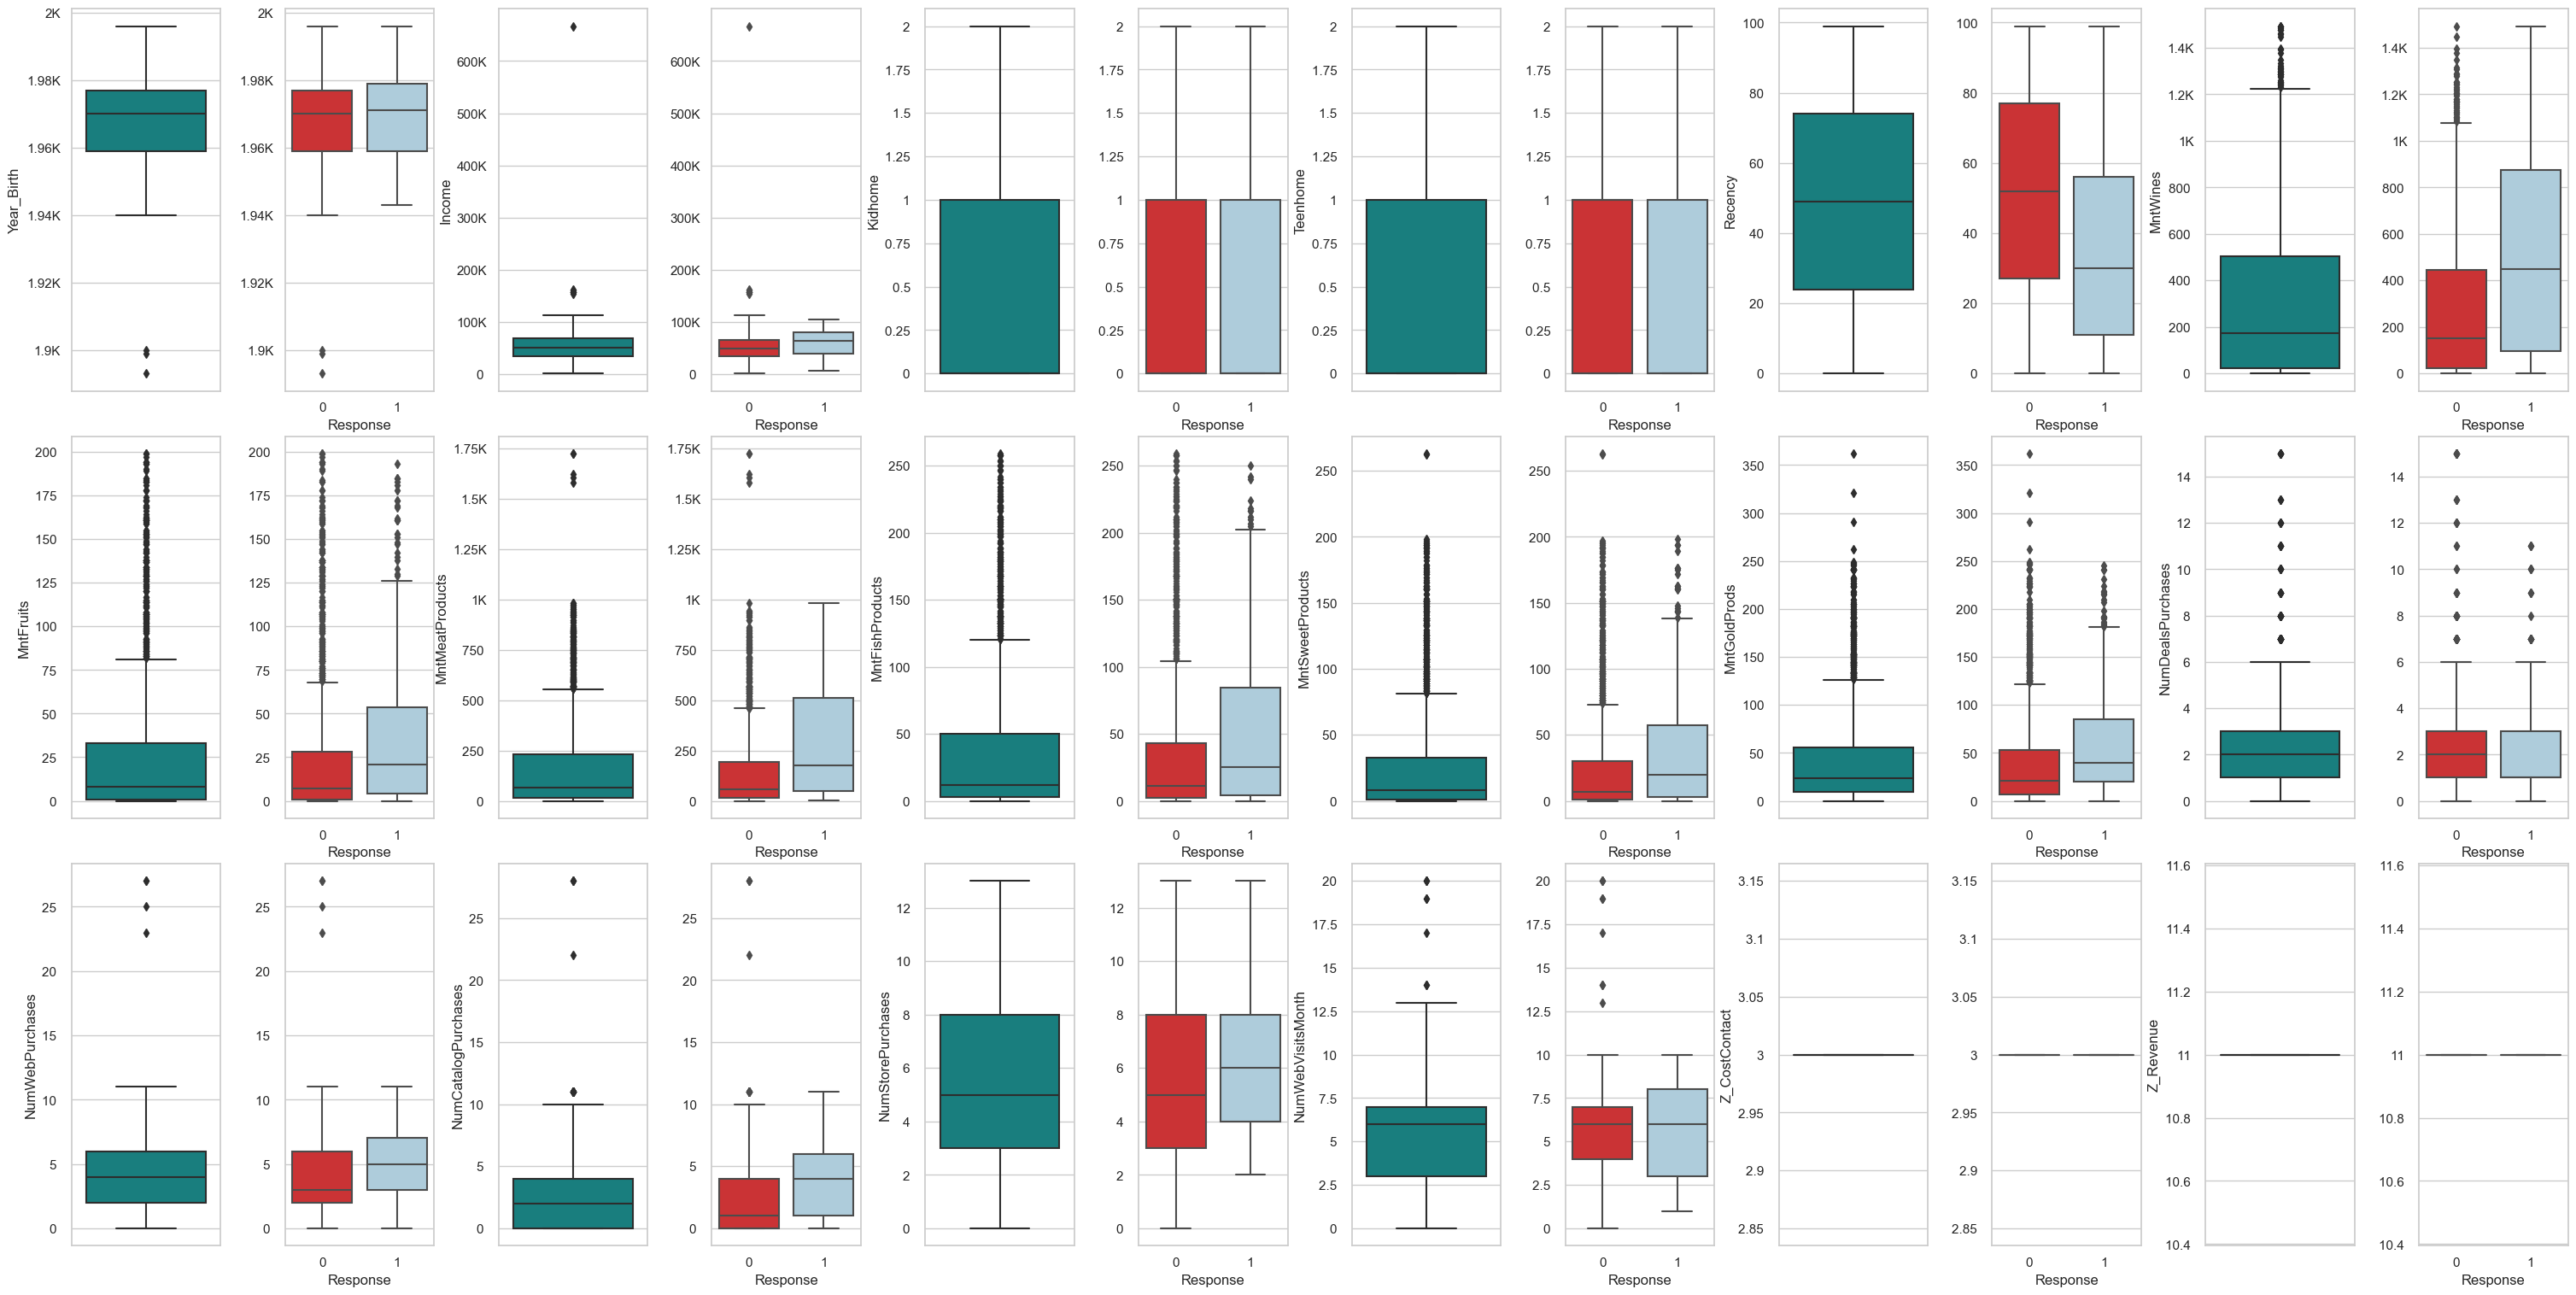

In [78]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

**IQR (Interquartile Range)**

IQR to be more robust since outliers are not included in the calculation of percentiles.

In [79]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low  = q1 - 1.5*iqr
#     fence_high = q3 + 1.5*iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_high]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_iqr(df, i)
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

**Z-Score**

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

In [80]:
from scipy import stats
def handling_outliers_zscore(data, cols):
    thres = 3
    mean = np.mean(df[cols])
    std = np.std(df[cols])
    zscore = abs((df[cols]-mean)/std)
    # zscore = abs(stats.zscore(data[cols]))
    
    outlier = data[zscore >= thres]
    
    filter_outliers = zscore < thres # negative value none, bcs absolute
    filtered = data[filter_outliers]
    return filtered

cols = ["Year_Birth","Income"]
print("Jumlah data sebelum handling outliers :", df.shape[0])

for i in cols:
    df = handling_outliers_zscore(df, i) 
    print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2229


## **📌 Feature Engineering / Extraction**

New Calculation, Extraction, and Binning features for business insight :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer
- Spending
- Total Accepted/Responses
- Income Segment
- Convertion Rate
- Total of days/years joined

**Membuat Kolom `Umur / Age`**

In [38]:
# SAS Institute, 2014
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<div>
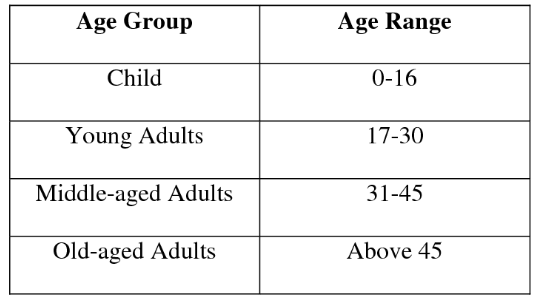
</div>

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [39]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child

In [40]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer

In [41]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [42]:
df['Lifetime'] = (2014 - df.Dt_Customer.dt.year)*12 + df.Dt_Customer.dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [43]:
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada keseluruhan product

In [44]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [45]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [46]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [47]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

In [48]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

,Z_Revenue,Total_revenue
1626,11,0
1854,11,0
2005,11,0
763,11,11
666,11,0


**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68522)
- Medium -> q1(35303) - q3(68522)
- Low -> < q1(35303)

In [49]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35376.0
68487.0


In [50]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

**Membuat Kolom `Convertion Rate Web`**

In [51]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month and Year Joined`**

In [52]:
df['Year_joined'] = df['Dt_Customer'].dt.year
df['Month_joined'] = df['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [53]:
Recency_sgmt=[]
for i in df['Recency']:
    if i <= 7  : 
        Recency_sgmt.append("<= seminggu")
    elif i <= 14 :
        Recency_sgmt.append("<= 14 hari")
    elif i <= 30 :
        Recency_sgmt.append("<= sebulan")
    elif i <= 60 : 
        Recency_sgmt.append("<= 2 bulan")
    else : 
        Recency_sgmt.append("> 2 bulan")
df['Recency_sgmt'] = Recency_sgmt

**Mengecek nilai Extraction**

In [54]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_group,Has_child,Dependents,Lifetime,Spending,Primer_purchase,Tersier_purchase,Total_Purchases,Total_Cmp,Ever_Accept,Total_revenue,Income_sgmt,Conversion_rate_web,Year_joined,Month_joined,Recency_sgmt
1384,793,1973,Graduation,Married,20895.0,1,0,2012-10-06,24,18,3,17,3,0,4,1,2,0,3,9,0,0,0,0,0,0,3,11,0,41,Adult,1,1,34,45,23,22,6,0,0,0,Low,0.67,2012,10,<= sebulan
1374,4743,1969,PhD,Married,56242.0,0,1,2013-03-03,72,689,8,167,11,8,88,5,8,4,11,6,0,0,0,0,0,0,3,11,0,45,Adult,1,1,15,971,186,785,28,0,0,0,Medium,4.67,2013,3,> 2 bulan
2148,7873,1973,PhD,Married,63516.0,1,1,2013-07-06,30,141,11,114,15,14,5,4,4,1,7,5,0,0,0,0,0,0,3,11,0,41,Adult,1,2,19,300,140,160,16,0,0,0,Medium,3.20,2013,7,<= sebulan
1951,2162,1976,Graduation,Married,56939.0,0,1,2013-09-18,19,256,34,103,90,29,49,2,3,3,10,3,0,0,0,0,0,0,3,11,0,38,Adult,1,1,21,561,227,334,18,0,0,0,Medium,6.00,2013,9,<= sebulan
1008,8975,1968,Graduation,Married,19514.0,1,1,2014-01-26,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,0,46,Senior Adult,1,2,1,69,26,43,10,1,1,11,Low,1.25,2014,1,<= 2 bulan


**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced, Widow, Others
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low, None

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1

**Numericals**

- Year_Birth = 1893 - 1996
- Income = 1730.0 - 666666.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 121
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Year_joined = 2012 - 2014
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [55]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Year_joined', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [56]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df:
    if i not in allcol:
        print(i)

Recency_sgmt


In [57]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df[x]), max(df[x])))

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced', 'Widow', 'Others']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[1, 0]

===== Has_child =====
[0, 1]

Year_Birth = 1893 - 1996
Income = 1730.0 - 666666.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 121
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Conversion_rate_web = 0.0 

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [59]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0) 
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist.sort_values(["Type of Distribution","Column Name"])

C:\Users\nurim\AppData\Local\Temp\ipykernel_12140\1435732549.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_12140\1435732549.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_12140\1435732549.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_12140\1435732549.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



,Column Name,Skewness,Kurtosis,Type of Distribution
2,Kidhome,0.635,-0.781,Bimodal Distribution
3,Teenhome,0.407,-0.987,Bimodal Distribution
13,Conversion_rate_web,2.329,6.418,Highly Positively Skewed
1,Income,6.726,158.658,Highly Positively Skewed
23,MntFishProducts,1.918,3.087,Highly Positively Skewed
21,MntFruits,2.101,4.039,Highly Positively Skewed
25,MntGoldProds,1.885,3.541,Highly Positively Skewed
22,MntMeatProducts,2.082,5.502,Highly Positively Skewed
24,MntSweetProducts,2.135,4.364,Highly Positively Skewed
20,MntWines,1.175,0.595,Highly Positively Skewed


# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

# **====== STAGE 4 ======**
`Stage 4 (Final Preparation & Simulation)`